Found 50 files


/var/folders/b5/cbnlm0vn1j54xy3c75jt4gwc0000gn/T/ipykernel_8250/1635606644.py:61: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bs--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(n_qubits_stab, sim_times_stab, "bs--", label="Stab-GPU(1D, no parse)", linestyle="-", markersize=5)
/var/folders/b5/cbnlm0vn1j54xy3c75jt4gwc0000gn/T/ipykernel_8250/1635606644.py:62: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g^-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(n_qubits_stim, sim_times_stim, "g^-", label="Stim (no parse)", linestyle="--", markersize=5)
/var/folders/b5/cbnlm0vn1j54xy3c75jt4gwc0000gn/T/ipykernel_8250/1635606644.py:72: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 60)


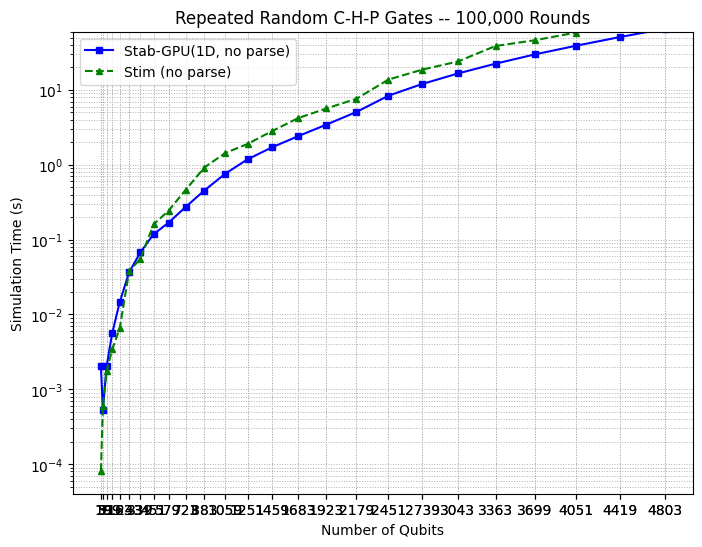

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt

import stim
import cirq

def read_and_label_file(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
    
    labels = ["sim_name", "sim_time", "distance", "rounds", "n_qubits"]
    data = {labels[i]: lines[i].strip() if i == 0 else float(lines[i]) for i in range(len(lines))}
    
    return data

def process_folder(folder_path):
    all_data = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"): 
            filepath = os.path.join(folder_path, filename)
            data = read_and_label_file(filepath)
            all_data.append(data)
    
    return all_data

def plot_data(all_data):
    sim_times_stab = []
    sim_times_stim = []
    sim_times_cirq = []
    sim_times_qiskit = []
    n_qubits_stab = []
    n_qubits_stim = []
    n_qubits_cirq = []
    n_qubits_qiskit = []

    for data in all_data:
        if data["sim_name"] == "stab":
            n_qubits_stab.append(float(data["n_qubits"]))
            sim_times_stab.append(float(data["sim_time"]))
        elif data["sim_name"] == "stim":
            n_qubits_stim.append(float(data["n_qubits"]))
            sim_times_stim.append(float(data["sim_time"]))
        # elif data["sim_name"] == "cirq":
        #     n_qubits_cirq.append(float(data["n_qubits"]))
        #     sim_times_cirq.append(float(data["sim_time"]))
        # elif data["sim_name"] == "qiskit":
        #     n_qubits_qiskit.append(float(data["n_qubits"]))
        #     sim_times_qiskit.append(float(data["sim_time"]))



    n_qubits_stab, sim_times_stab = zip(*sorted(zip(n_qubits_stab, sim_times_stab))) if n_qubits_stab else ([], [])
    n_qubits_stim, sim_times_stim = zip(*sorted(zip(n_qubits_stim, sim_times_stim))) if n_qubits_stim else ([], [])
    # n_qubits_cirq, sim_times_cirq = zip(*sorted(zip(n_qubits_cirq, sim_times_cirq))) if n_qubits_cirq else ([], [])
    # n_qubits_qiskit, sim_times_qiskit = zip(*sorted(zip(n_qubits_qiskit, sim_times_qiskit))) if n_qubits_qiskit else ([], [])


    plt.figure(figsize=(8, 6))
    plt.plot(n_qubits_stab, sim_times_stab, "bs--", label="Stab-GPU(1D, no parse)", linestyle="-", markersize=5)
    plt.plot(n_qubits_stim, sim_times_stim, "g^-", label="Stim (no parse)", linestyle="--", markersize=5)
    # plt.plot(n_qubits_cirq, sim_times_cirq, "mv--", label="Cirq (pre-compiled)", linestyle="--", markersize=5)
    # plt.plot(n_qubits_qiskit, sim_times_qiskit, "k^--", label="Qiskit (pre-compiled)", linestyle="--", markersize=5)


    plt.xlabel("Number of Qubits")
    plt.ylabel("Simulation Time (s)")
    # plt.xscale("log", base=10) 
    plt.yscale("log", base=10)

    plt.ylim(0, 60)
    plt.xticks(n_qubits_stab + n_qubits_stim, 
               labels=[f"{int(q)}" for q in n_qubits_stab + n_qubits_stim]) 
    plt.title("Repeated Random C-H-P Gates -- 100,000 Rounds")
    plt.legend()
    plt.grid(True, linestyle=":", linewidth=0.7, which="both")
    plt.show()


folder_path = "surface_code_test"  
all_data = process_folder(folder_path)

print(f"Found {len(all_data)} files")

if not all_data:
    print("No data found.")

plot_data(all_data)